In [1]:
import os
print(os.getcwd())
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Udit/programs/github/S18_Code/course_repos/is/code/allennlp/analysis


In [2]:
import pandas as pd

In [3]:
base_file = "data/newsqa_dev_df.pkl"
newsqa_dev_df = pd.read_pickle(base_file)

error_file="data/results/sq_dev_dump.pkl"
newsqa_err_df = pd.read_pickle(error_file)


In [5]:
print(newsqa_dev_df.columns)

print(newsqa_err_df.columns)

Index(['id', 'context-length', 'num-context-ner-features',
       'context-ner-features', 'num-context-date-features',
       'context-date-features', 'q-word', 'q-word-pos', 'prev-q-word',
       'prev-q-word-pos', 'next-q-word', 'next-q-word-pos', 'is-q-word-begin',
       'num-q-ner-features', 'q-ner-features', 'answer-length', 'answer-start',
       'num-answer-ner-features', 'answer-ner-features',
       'num-answer-date-features', 'answer-date-features'],
      dtype='object')
Index(['id', 'correct', 'gold-answer', 'pred-answer'], dtype='object')


In [6]:
merged = pd.merge(newsqa_dev_df, newsqa_err_df, on='id')
window_length = 100

In [7]:
copy_df = merged.copy()

In [8]:
merged.columns

Index(['id', 'context-length', 'num-context-ner-features',
       'context-ner-features', 'num-context-date-features',
       'context-date-features', 'q-word', 'q-word-pos', 'prev-q-word',
       'prev-q-word-pos', 'next-q-word', 'next-q-word-pos', 'is-q-word-begin',
       'num-q-ner-features', 'q-ner-features', 'answer-length', 'answer-start',
       'num-answer-ner-features', 'answer-ner-features',
       'num-answer-date-features', 'answer-date-features', 'correct',
       'gold-answer', 'pred-answer'],
      dtype='object')

In [9]:
sorted_context_length = merged.sort_values(by='context-length')

In [11]:
sorted_context_length.head

<bound method NDFrame.head of                                              id context-length  \
2955  0878d4e06a54247df498a7921d3537a9db25814e6            131   
239   f88b3774a85d0379925a90a7a833ddcc059a82ef2            131   
240   f88b3774a85d0379925a90a7a833ddcc059a82ef3            131   
241   f88b3774a85d0379925a90a7a833ddcc059a82ef4            131   
242   f88b3774a85d0379925a90a7a833ddcc059a82ef5            131   
2949  0878d4e06a54247df498a7921d3537a9db25814e0            131   
2950  0878d4e06a54247df498a7921d3537a9db25814e1            131   
2951  0878d4e06a54247df498a7921d3537a9db25814e2            131   
2952  0878d4e06a54247df498a7921d3537a9db25814e3            131   
2953  0878d4e06a54247df498a7921d3537a9db25814e4            131   
2954  0878d4e06a54247df498a7921d3537a9db25814e5            131   
238   f88b3774a85d0379925a90a7a833ddcc059a82ef1            131   
237   f88b3774a85d0379925a90a7a833ddcc059a82ef0            131   
4935  0054d6d30dbcad772e20b22771153a2a9cbeaf62

In [14]:
def plot_cols(sm_copy, columns, title):
    columns = ['id'] + columns
    sm = sm_copy.copy()
    sm_cl = sm.loc[:,columns]
    ax_1 = sm_cl.plot(x='id',title=title, figsize=(20,10),color='g')

In [16]:
sorted_context_length['new-correct'] = sorted_context_length['correct'].rolling(20).mean()

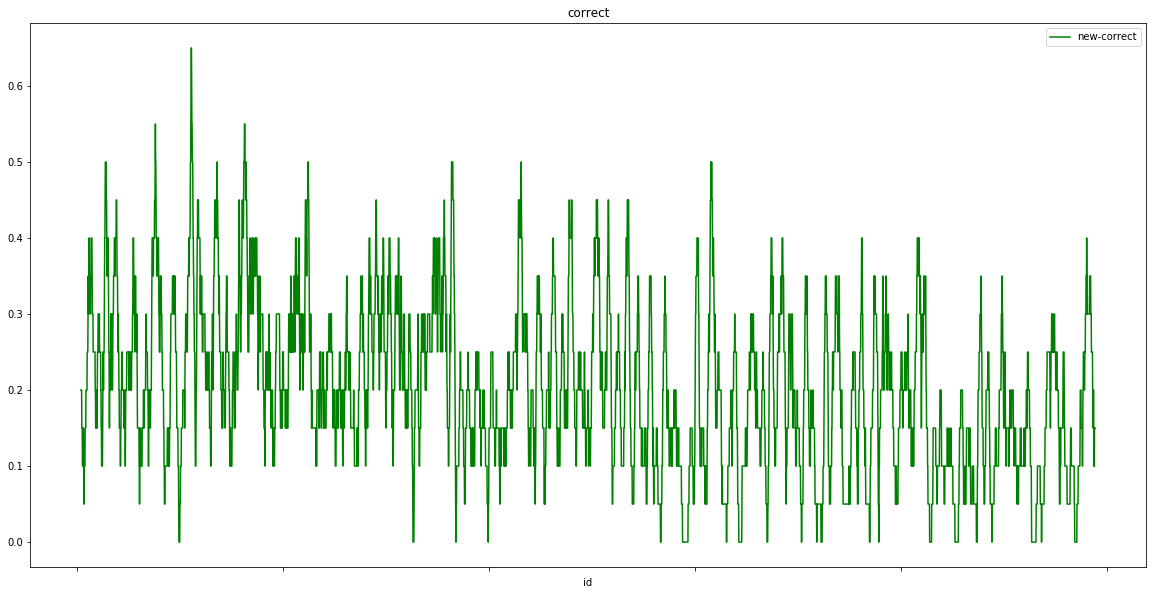

In [17]:
plot_cols(sorted_context_length, ['new-correct'], 'correct')